# Практическая работа №2
## по предмету "Системы искусственного интеллекта"
### Выполнила студентка группы БВТ2101 Пьянова Анна

Целью практической работы является изучение моделей машинного обучения для задачи регрессии.

Выполните предварительную обработку и анализ набора данных.

Затем вам необходимо выбрать 3 модели машинного обучения, которые могут решать задачу регрессии, и обучить их на основе данного набора данных. Обязательным условием является построение графика изменения loss для каждой из выбранных моделей. В результате выполнения работы необходимо сделать вывод, какая из моделей лучше подошла для решения поставленной задачи.

### Выполнение работы

Предварительная обработка и анализ набора данных

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('processor.csv')
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [16]:
data.select_dtypes(include=['int64', 'float64']).corr()

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.140392,-0.148738
Number of Ratings,-0.140392,1.000000,0.989626
Number of Reviews,-0.148738,0.989626,1.000000


In [4]:
X = data.drop('Price', axis=1)
y = data['Price']

# Определение числовых и категориальных признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Препроцессор для числовых признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Препроцессор для категориальных признаков
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Объединение препроцессоров
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Применение препроцессора
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

Функция для построения графика потерь

In [6]:
def plot_loss(y_train, y_train_pred, y_test, y_test_pred, y_val, y_val_pred, model_name):
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)

    plt.figure(figsize=(12, 6))

    plt.scatter(y_train, y_train_pred, alpha=0.5, label=f"Train Data\nMSE: {mse_train:.4f}")
    plt.scatter(y_test, y_test_pred, alpha=0.5, label=f"Test Data\nMSE: {mse_test:.4f}")
    plt.scatter(y_val, y_val_pred, alpha=0.5, label=f"Validation Data\nMSE: {mse_val:.4f}")

    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', linewidth=2, label="Ideal Fit")

    plt.title(f"Loss Plots for {model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.legend()
    plt.tight_layout()
    plt.show()

Обучение модели Linear Regression

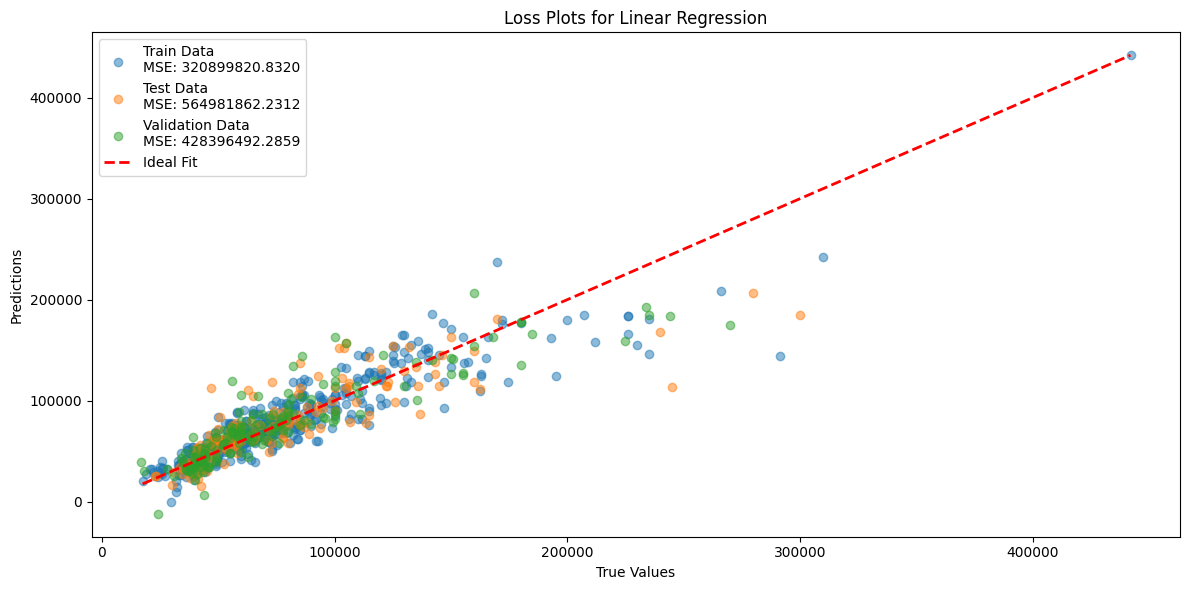

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
y_val_pred_lr = lr_model.predict(X_val)

plot_loss(y_train, y_train_pred_lr, y_test, y_test_pred_lr, y_val, y_val_pred_lr, "Linear Regression")

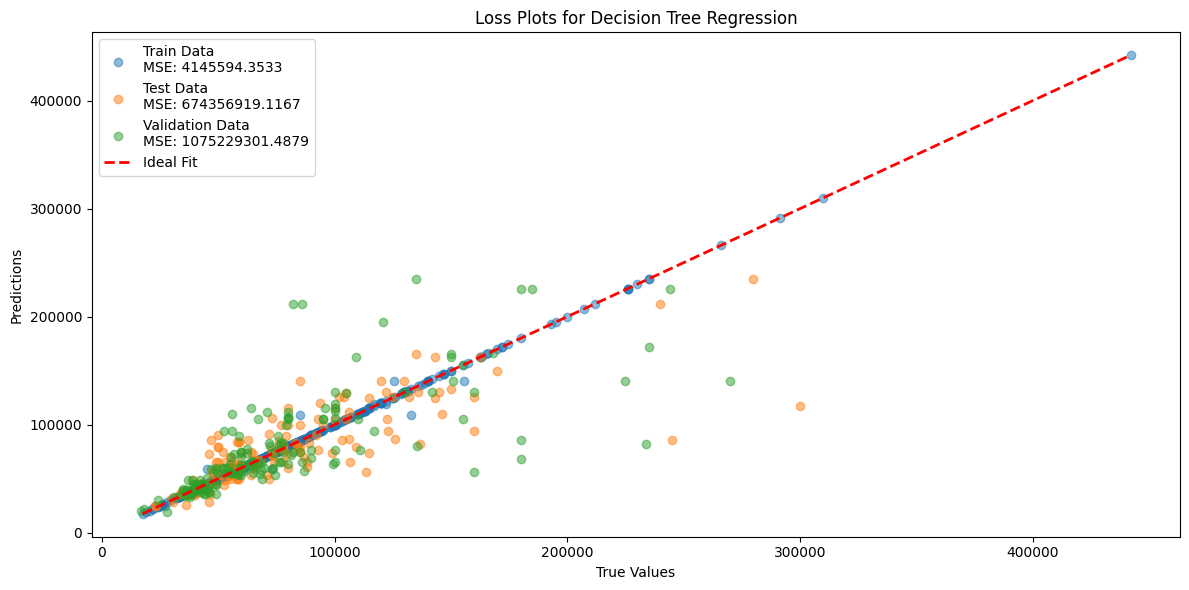

In [10]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
y_val_pred_dt = dt_model.predict(X_val)

plot_loss(y_train, y_train_pred_dt, y_test, y_test_pred_dt, y_val, y_val_pred_dt, "Decision Tree Regression")

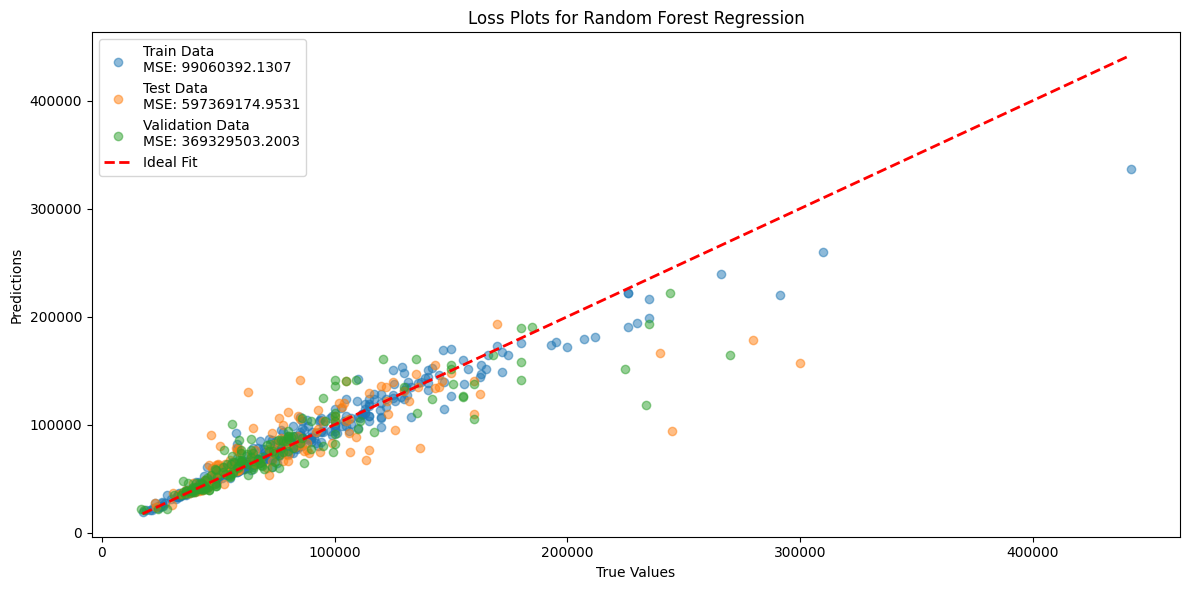

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
y_val_pred_rf = rf_model.predict(X_val)

plot_loss(y_train, y_train_pred_rf, y_test, y_test_pred_rf, y_val, y_val_pred_rf, "Random Forest Regression")